## Importing Libraries

In [285]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import joblib


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


import warnings 
warnings.filterwarnings('ignore')




## Reading the dataset

In [286]:
df=pd.read_csv(r'E:\python\Practical Machine Learning\Project_1\tehranhouses.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


## EDA

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 146.2+ KB


In [288]:
#Droping Price(USD) column
df.drop('Price(USD)',axis=1,inplace=True)

In [289]:
#Changing Dtypes(object) of columns
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [290]:
#Changing Dtypes (boolean) of columns
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

In [291]:
#droping 
df.drop(1604,inplace=True,axis=0)
df.drop(709,inplace=True,axis=0)
df.drop(570,inplace=True,axis=0)
df.drop(2802,inplace=True,axis=0)

In [292]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price
count,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,3.475000e+03
mean,108.036835,2.079712,0.847770,0.914532,0.787050,5.356351e+09
std,92.463177,0.758547,0.359296,0.279617,0.409451,8.102111e+09
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.416250e+09
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.891700e+09
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09
max,3600.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10


In [293]:
#How many NaN value are exist in dataset
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64

In [294]:
# How many duplicates do we have
print(f'we have {df.duplicated().sum()} duplicates in our dataset')

we have 208 duplicates in our dataset


In [295]:
# What percentage of houses have parking?
df['Parking'].value_counts(normalize=True)*100

Parking
1    84.776978
0    15.223022
Name: proportion, dtype: float64

In [296]:
# What percentage of houses have elevators?
df['Elevator'].value_counts(normalize=True)*100

Elevator
1    78.705036
0    21.294964
Name: proportion, dtype: float64

In [297]:
# What percentage of houses have Warehouse?
df['Warehouse'].value_counts(normalize=True)*100

Warehouse
1    91.453237
0     8.546763
Name: proportion, dtype: float64

In [298]:
# House mean prices by Room
df.groupby( 'Room' )['Price'].mean()

Room
0    7.860500e+09
1    1.703751e+09
2    3.320382e+09
3    1.091864e+10
4    2.560033e+10
5    3.373439e+10
Name: Price, dtype: float64

In [299]:
# House mean prices by Room and Parking
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,0,9.769750e+09
1,0,1,2.235000e+08
2,1,0,1.135640e+09
3,1,1,2.028956e+09
4,2,0,1.501674e+09
5,2,1,3.579288e+09
6,3,0,5.107865e+09
7,3,1,1.113294e+10
8,4,0,6.200000e+09
9,4,1,2.588149e+10


In [300]:
# House mean prices by Room and Elevator
room_parking_room_mean_df = df.groupby( ['Room','Elevator'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Elevator,Price
0,0,0,9.769750e+09
1,0,1,2.235000e+08
2,1,0,1.216397e+09
3,1,1,2.061731e+09
4,2,0,2.122742e+09
5,2,1,3.584699e+09
6,3,0,7.661724e+09
7,3,1,1.115264e+10
8,4,0,1.252941e+10
9,4,1,2.979289e+10


In [301]:
# House mean prices by Room and Warehouse
room_parking_room_mean_df = df.groupby( ['Room','Warehouse'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Warehouse,Price
0,0,0,1.532960e+10
1,0,1,3.914000e+08
2,1,0,1.356133e+09
3,1,1,1.771670e+09
4,2,0,1.786901e+09
5,2,1,3.448526e+09
6,3,0,7.352833e+09
7,3,1,1.102411e+10
8,4,0,3.673333e+09
9,4,1,2.658213e+10


In [302]:
# We can see that this is not a house and maybe it is a land in the north of Tehran
df1=df[df.Room==0]
df1.style.highlight_max('Price',color='yellow')

,Area,Room,Parking,Warehouse,Elevator,Address,Price
103,40,0,0,0,0,Shahrake Qods,248000000
137,40,0,0,0,0,Pakdasht,165000000
1169,40,0,0,1,0,Ostad Moein,650000000
2084,40,0,0,0,0,Pakdasht,165000000
2103,43,0,0,1,0,Nasim Shahr,360000000
2625,50,0,1,1,1,Northern Chitgar,345000000
2721,110,0,1,1,1,Parand,102000000
3107,630,0,0,0,0,Tajrish,75600000000
3211,30,0,0,1,0,Ostad Moein,500000000
3435,54,0,0,0,0,Shahrake Qods,470000000


# Visualizaion

<Figure size 800x500 with 0 Axes>

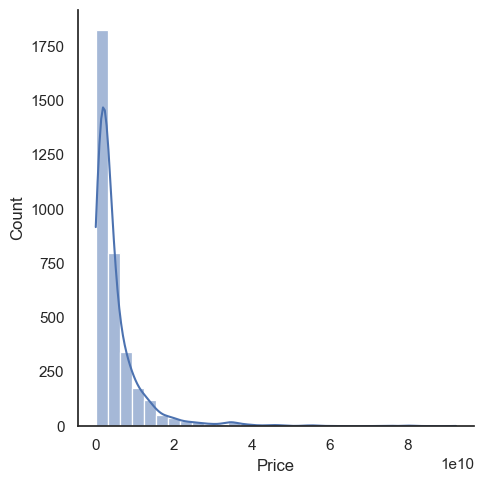

In [303]:
# Displot of Price
plt.figure(figsize=(8,5))
sns.displot(df['Price'] , bins=30 , kde=True )
# We can see skewness of Price

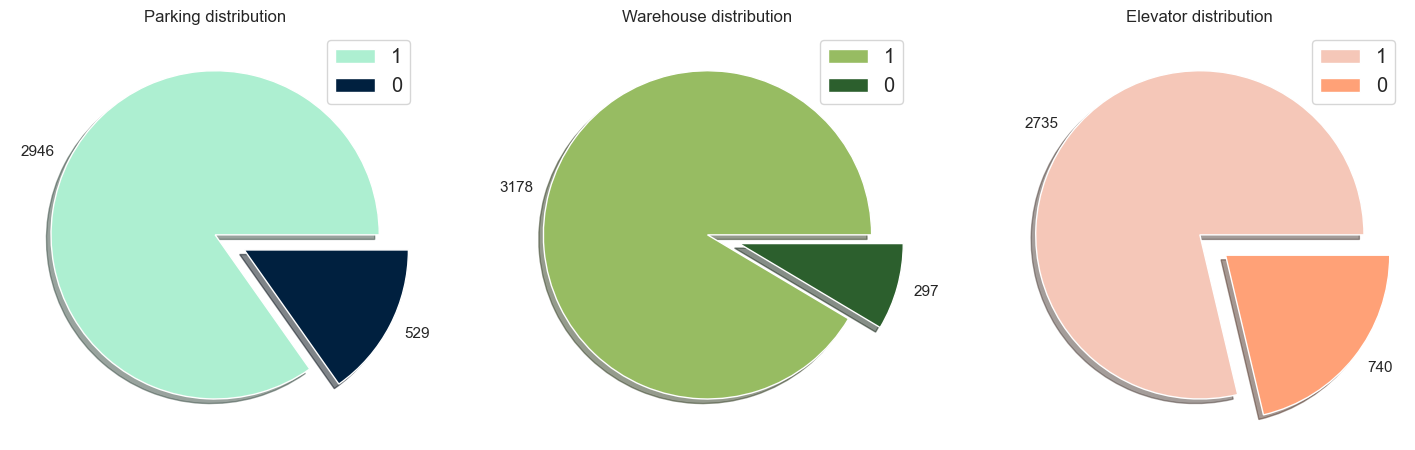

In [304]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

Text(0.5, 1.0, 'Number of flats in location')

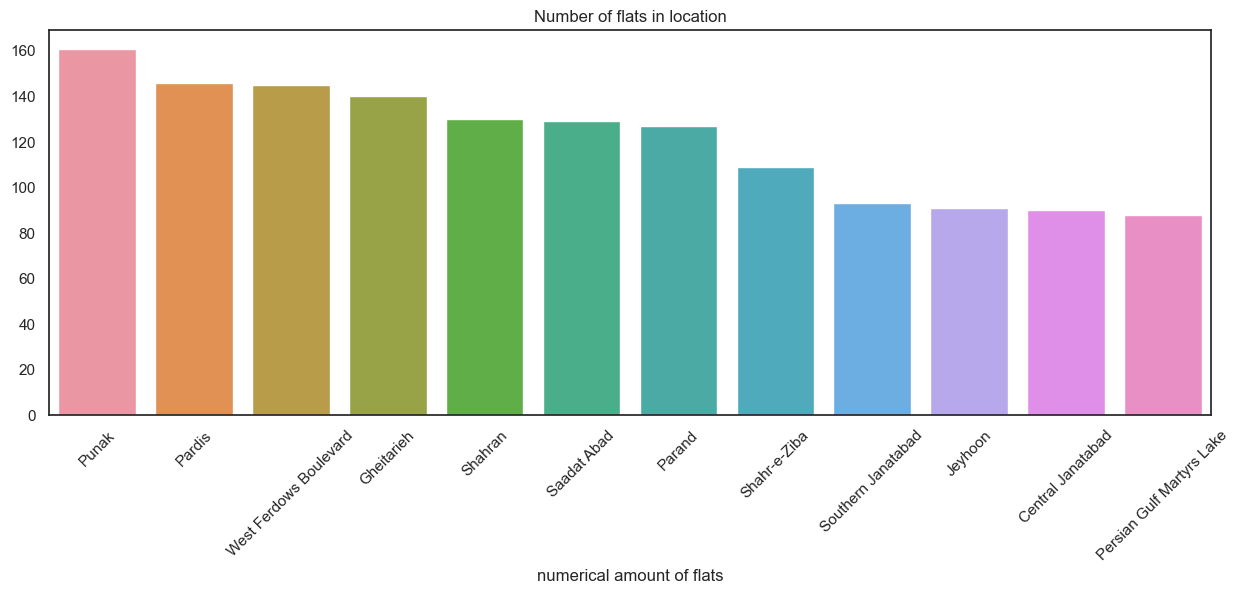

In [305]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:12]
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=df3.index, y=df3.values,ax=ax)
plt.xlabel('numerical amount of flats')
plt.xticks(rotation=45)
plt.title('Number of flats in location')

In [306]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], dtype='object')

# PreProcessing

In [307]:
# Droping Nan values
df.dropna(inplace=True)

In [308]:
#Droping duplicated values
df.drop_duplicates(inplace=True)

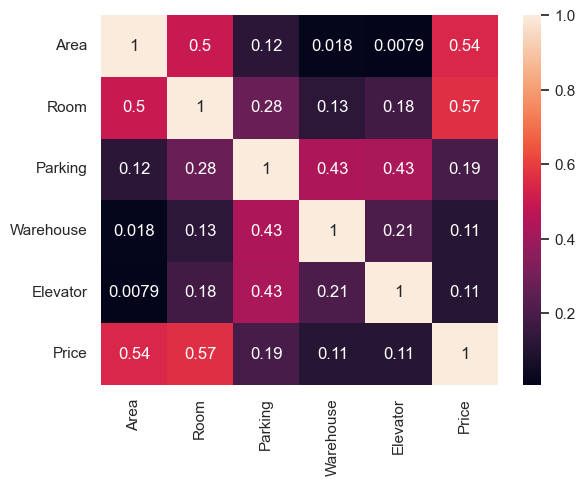

In [309]:
sns.heatmap(df.drop('Address',axis='columns',inplace=False).corr(), annot=True)
plt.show()

In [310]:
#Removing Outliers
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -8.00
Upper limit for area: 200.00
Lower limit for price: -5,721,875,000.0
Upper limit for price: 13,323,125,000.0


In [311]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 188
Number of price outliers: 271
Number of outliers: 315


In [312]:
df = df[(df['Area'] >= lower_area) & (df['Area'] <= upper_area)]

In [313]:
df_no_outliers = df[(df['Price'] >= lower_price) & (df['Price'] <= upper_price)]

<Axes: xlabel='Price'>

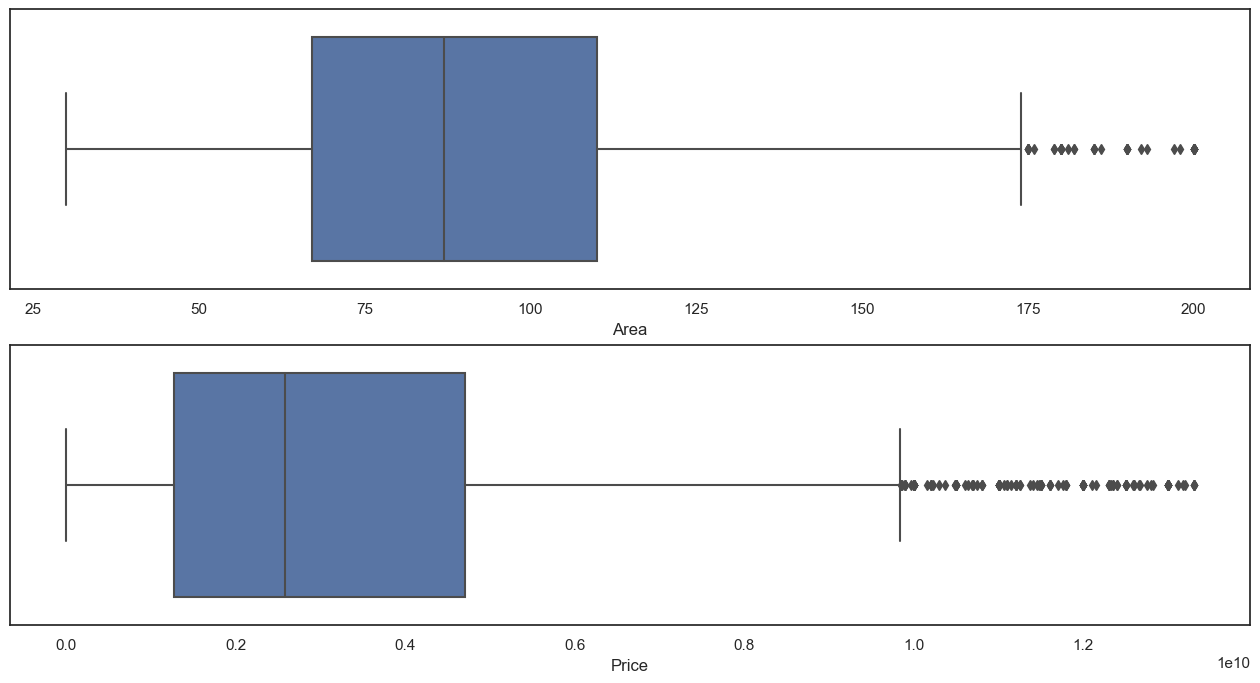

In [314]:
# Boxplot
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df_no_outliers['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df_no_outliers['Price'])

In [315]:
df_no_outliers['Address'].unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Sadeghieh', 'Chahardangeh', 'Pakdasht', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Baghestan', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'Persian Gulf Martyrs La

In [316]:
#skewness is ok
print("skew feature after drop outliers: \n",df_no_outliers.drop('Address',axis='columns',inplace=False).skew())

skew feature after drop outliers: 
 Area         0.771605
Room         0.201095
Parking     -1.780454
Warehouse   -2.878561
Elevator    -1.385059
Price        1.301854
dtype: float64


In [317]:
df_no_outliers.to_csv("E:\python\Practical Machine Learning\Project_1\df_no_outlier.csv")

In [318]:
df_no_outliers

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3473,63,1,1,1,0,Feiz Garden,1890000000
3474,86,2,1,1,1,Southern Janatabad,3500000000
3475,83,2,1,1,1,Niavaran,6800000000
3477,105,2,1,1,1,Dorous,5600000000


In [319]:
#One hot encoding
address_dummy = pd.get_dummies(df['Address'],dtype=int)
df_final = df.merge(address_dummy, left_index = True, right_index = True,)
df_final.drop(columns = ['Address'], inplace = True)
df_final.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Abuzar,Afsarieh,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [320]:
df_final.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price', 'Abazar',
       'Abbasabad', 'Abuzar', 'Afsarieh',
       ...
       'Waterfall', 'West Ferdows Boulevard', 'West Pars', 'Yaftabad',
       'Yakhchiabad', 'Yousef Abad', 'Zafar', 'Zaferanieh', 'Zargandeh',
       'Zibadasht'],
      dtype='object', length=193)

In [321]:
X = df_final.drop(columns = 'Price')
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2444, 192)
shape of y train: (2444,)
shape of x test: (612, 192)
shape of y train: (612,)


In [322]:
X.to_csv(r'E:\python\Practical Machine Learning\Project_1\df_final.csv')

In [323]:
def sanitize_filename(name):
    """Sanitize the model name to create a valid file name."""
    return name.replace('<', '_').replace('>', '_').replace('/', '_').replace('\\', '_')
def parameter_finder (model, parameters):
    
    start = time.time()
    
    grid = GridSearchCV(model, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1), 
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_name = str(model).split('(')[0].strip()
    sanitized_model_name = sanitize_filename(model_name)
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
    
    save_path=r'E:\python\Practical Machine Learning\Project_1'
    joblib_file = f"{save_path}/{model_name}_best_model.joblib"
    joblib.dump(grid_fit.best_estimator_, joblib_file)
    print(f"Best {model_name} model saved to {joblib_file}")
    
       
    return train_score, test_score, RMSE

In [324]:
ridge = Ridge(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)

The best parameters for Ridge model is: {'alpha': 1}
--------------------
(R2 score) in the training set is 81.45% for Ridge model.
(R2 score) in the testing set is 81.19% for Ridge model.
RMSE is 1,868,185,262.3718047 for Ridge model.
--------------------
Runtime of the program is: 4.15
Best Ridge model saved to E:\python\Practical Machine Learning\Project_1/Ridge_best_model.joblib


In [325]:
lasso = Lasso(random_state = 1) # Linear Model trained with L1 prior as regularizer.
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 10}
--------------------
(R2 score) in the training set is 81.73% for Lasso model.
(R2 score) in the testing set is 81.04% for Lasso model.
RMSE is 1,875,396,142.1239035 for Lasso model.
--------------------
Runtime of the program is: 3.92
Best Lasso model saved to E:\python\Practical Machine Learning\Project_1/Lasso_best_model.joblib


In [326]:
eln = ElasticNet(random_state = 1) # Linear regression with combined L1 and L2 priors as regularizer.
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10],
            'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]}

eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 0.6}
--------------------
(R2 score) in the training set is 81.46% for ElasticNet model.
(R2 score) in the testing set is 81.20% for ElasticNet model.
RMSE is 1,867,884,836.12607 for ElasticNet model.
--------------------
Runtime of the program is: 2.03
Best ElasticNet model saved to E:\python\Practical Machine Learning\Project_1/ElasticNet_best_model.joblib


In [327]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 5}
--------------------
(R2 score) in the training set is 95.60% for DecisionTreeRegressor model.
(R2 score) in the testing set is 68.58% for DecisionTreeRegressor model.
RMSE is 2,414,459,525.855111 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 0.53
Best DecisionTreeRegressor model saved to E:\python\Practical Machine Learning\Project_1/DecisionTreeRegressor_best_model.joblib


In [328]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_rfr)

The best parameters for RandomForestRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 5}
--------------------
(R2 score) in the training set is 93.32% for RandomForestRegressor model.
(R2 score) in the testing set is 79.29% for RandomForestRegressor model.
RMSE is 1,960,139,831.6093686 for RandomForestRegressor model.
--------------------
Runtime of the program is: 6.71
Best RandomForestRegressor model saved to E:\python\Practical Machine Learning\Project_1/RandomForestRegressor_best_model.joblib


In [329]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 15, 'weights': 'distance'}
--------------------
(R2 score) in the training set is 97.67% for KNeighborsRegressor model.
(R2 score) in the testing set is 64.55% for KNeighborsRegressor model.
RMSE is 2,564,597,311.7328186 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 1.35
Best KNeighborsRegressor model saved to E:\python\Practical Machine Learning\Project_1/KNeighborsRegressor_best_model.joblib


In [330]:
xgboost = XGBRegressor(n_jobs = -1,cv=5 ,random_state=1 )
param_xgboost = {'n_estimators': [250],
             'learning_rate': [0.1],
             'subsample': [0.75],
             'colsample_bytree': [0.3],
             'min_child_weight': [1],
             'max_depth': [4],
             'gamma': [0]}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = parameter_finder(xgboost, param_xgboost)

The best parameters for XGBRegressor model is: {'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 250, 'subsample': 0.75}
--------------------
(R2 score) in the training set is 89.36% for XGBRegressor model.
(R2 score) in the testing set is 82.34% for XGBRegressor model.
RMSE is 1,810,329,616.3688073 for XGBRegressor model.
--------------------
Runtime of the program is: 4.25
Best XGBRegressor model saved to E:\python\Practical Machine Learning\Project_1/XGBRegressor_best_model.joblib


In [331]:
models_score = pd.DataFrame({'Training score': [ridge_train_score, lasso_train_score, eln_train_score, dtr_train_score, rfr_train_score, knr_train_score,xgboost_train_score],
                             'Testing score': [ridge_test_score, lasso_test_score, eln_test_score, dtr_test_score, rfr_test_score, knr_test_score,xgboost_test_score],
                             'RMSE': [ridge_RMSE, lasso_RMSE, eln_RMSE, dtr_RMSE, rfr_RMSE, knr_RMSE,xgboost_RMSE]},
                             index = ['Ridge', 'Lasso','ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'KNeighborsRegressor','XGBoostRegressor'])

models_score

,Training score,Testing score,RMSE
Ridge,0.814491,0.811895,1.868185e+09
Lasso,0.817314,0.810440,1.875396e+09
ElasticNet,0.814580,0.811956,1.867885e+09
DecisionTreeRegressor,0.956017,0.685805,2.414460e+09
RandomForestRegressor,0.933194,0.792922,1.960140e+09
KNeighborsRegressor,0.976677,0.645515,2.564597e+09
XGBoostRegressor,0.893615,0.823366,1.810330e+09


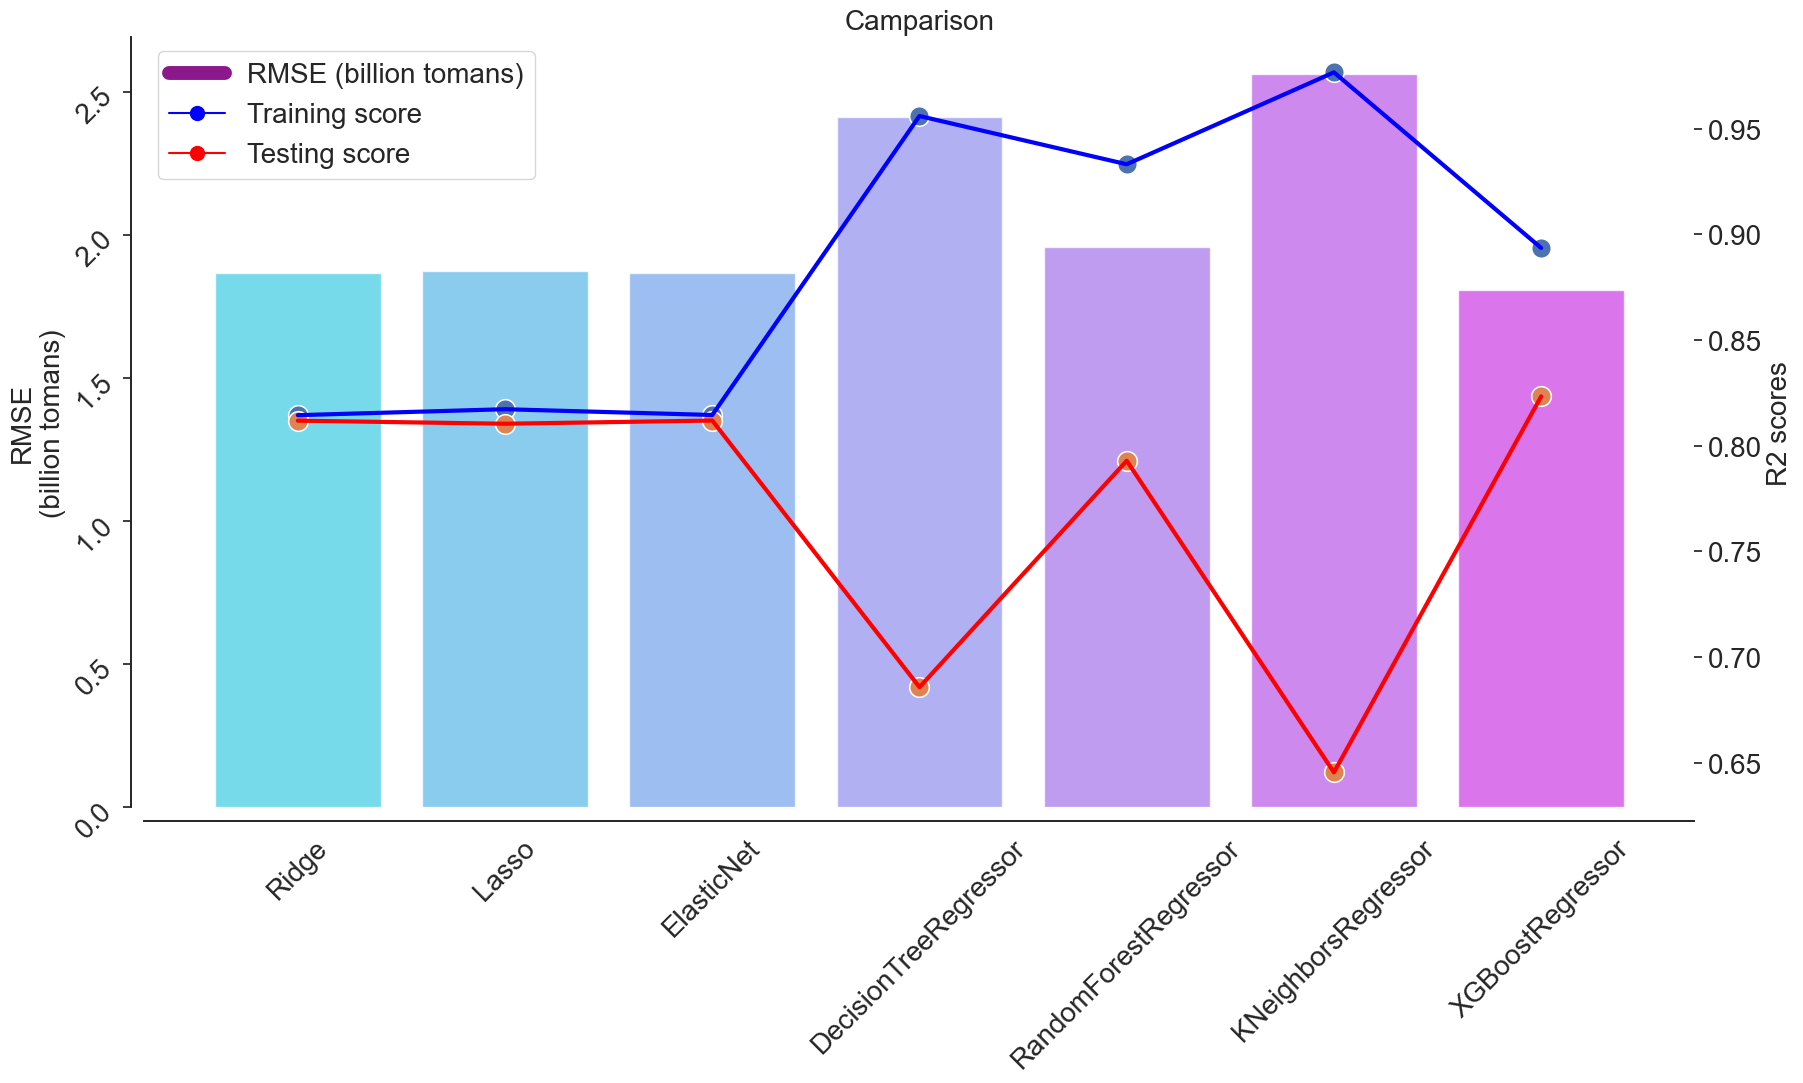

In [344]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(style='white')

ax.set_title("Camparison", fontsize = 20)

ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='cool')

ax.set_ylabel("RMSE\n(billion tomans)", fontsize = 20)

rmse_handle = plt.Line2D([], [], color='purple', alpha=0.9, lw=10, label='RMSE (billion tomans)')

sec_ax = ax.twinx()

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Training score'], linewidth = 3, color = 'blue')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Training score'], s = 200)

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Testing score'], linewidth = 3, color = 'red')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Testing score'], s = 200)

sec_ax.set_ylabel("R2 scores", fontsize = 20)

training_handle = plt.Line2D([], [], color='blue', marker='o', markersize=10, label='Training score')
testing_handle = plt.Line2D([], [], color='red', marker='o', markersize=10, label='Testing score')


handles = [rmse_handle, training_handle, testing_handle]

# Add legend to the plot
ax.legend(handles=handles, fontsize=20, loc='upper left')

# Increase tick label sizes for both axes
# Increase tick label sizes for both axes
ax.tick_params(axis='both', which='major', labelsize=20,rotation=45)
sec_ax.tick_params(axis='both', which='major', labelsize=20)

# Rotate x-axis tick labels by 45 degrees using plt.xticks


sns.despine(offset=10)
plt.savefig(r'E:\python\Practical Machine Learning\Project_1\Models Comparision.png', dpi=300, bbox_inches='tight')
plt.show()